In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

C:\Users\jjk\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [159]:
dt = pd.read_csv('Train.csv')
display (dt.head())

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [160]:
#Display the shape 
print (dt.shape)

(8523, 12)


In [161]:
#Display the column names
display (dt.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [162]:
#Describe the column 
display (dt.describe())

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [163]:
#Display Info 
display (dt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


None

In [164]:
#Display the Unique Values for each column
display (dt.apply(lambda x: len(x.unique())))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [165]:
#Check for Null Values 
display (dt.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [166]:
#Store the Categorical columns in a list
cat_col = dt.select_dtypes(include=['object']).columns.tolist()
display(cat_col)

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [167]:
#Delete the columns
cat_col = [col for col in cat_col if col not in ['Item_Identifier', 'Outlet_Identifier']]
display(cat_col)

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [168]:
#Display the Unique Values in category columns – Count 
unique_counts = {col: dt[col].nunique() for col in cat_col}
for col, count in unique_counts.items():
    print(col, count)

Item_Fat_Content 5
Item_Type 16
Outlet_Size 3
Outlet_Location_Type 3
Outlet_Type 4


In [169]:
#Unique values in each category
for col in cat_col:
    print(f"Column: {col}")
    print(dt[col].value_counts())
    print("\n" + "*" * 50 + "\n")

Column: Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

**************************************************

Column: Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

**************************************************

Column: Outlet_Size
Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

**************************************************

Column: Outlet_Location_Type
Outlet_Location_Type
Tier 3

In [170]:
#Display the missing values - missing values will be True 
miss_bool = dt['Item_Weight'].isnull()
display (miss_bool)

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [171]:
#Missing value count - column - Item_Weight
print(dt['Item_Weight'].isna().sum())

1463


In [172]:
#Display all NULL Records 
Item_Weight_null = dt[dt['Item_Weight'].isnull()]
print(Item_Weight_null)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
7              FDP10          NaN          Low Fat         0.127470   
18             DRI11          NaN          Low Fat         0.034238   
21             FDW12          NaN          Regular         0.035400   
23             FDC37          NaN          Low Fat         0.057557   
29             FDC14          NaN          Regular         0.072222   
...              ...          ...              ...              ...   
8485           DRK37          NaN          Low Fat         0.043792   
8487           DRG13          NaN          Low Fat         0.037006   
8488           NCN14          NaN          Low Fat         0.091473   
8490           FDU44          NaN          Regular         0.102296   
8504           NCN18          NaN          Low Fat         0.124111   

                  Item_Type  Item_MRP Outlet_Identifier  \
7               Snack Foods  107.7622            OUT027   
18              Hard Drinks  

In [173]:
#NULL Records by Item Identifier column 
Item_Weight_null['Item_Identifier'].value_counts()

Item_Identifier
FDK08    2
FDA08    2
FDV23    2
FDY56    2
FDI04    2
        ..
FDM44    1
FDZ48    1
FDK41    1
FDD57    1
NCN18    1
Name: count, Length: 1142, dtype: int64

In [174]:
#Item Weight group by Item Identifier 
item_weight_mean = dt.pivot_table(values="Item_Weight", index="Item_Identifier", aggfunc="mean")
print(item_weight_mean)

                 Item_Weight
Item_Identifier             
DRA12                 11.600
DRA24                 19.350
DRA59                  8.270
DRB01                  7.390
DRB13                  6.115
...                      ...
NCZ30                  6.590
NCZ41                 19.850
NCZ42                 10.500
NCZ53                  9.600
NCZ54                 14.650

[1555 rows x 1 columns]


In [175]:
#Display Item Identifier column  
display (dt['Item_Identifier'])

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

In [176]:
# Fill missing Item_Weight values based on Item_Identifier
dt['Item_Weight'] = dt.apply(
    lambda row: item_weight_mean.loc[row['Item_Identifier'], 'Item_Weight']
    if pd.isnull(row['Item_Weight']) and row['Item_Identifier'] in item_weight_mean.index
    else row['Item_Weight'],
    axis=1
)

# Fill remaining missing values with the overall mean
dt['Item_Weight'].fillna(dt['Item_Weight'].mean(), inplace=True)

In [177]:
#Check the Null values again
result = dt['Item_Weight'].isnull().sum()
display (result)

0

In [178]:
#Record count based on 'Outlet_Size'
result = dt.groupby('Outlet_Size').agg({'Outlet_Size': np.size})
display (result)

,Outlet_Size
Outlet_Size,
High,932
Medium,2793
Small,2388


In [179]:
#NULL Record based on 'Outlet_Size'
result= dt['Outlet_Size'].isnull().sum()
display (result)

2410

In [180]:
#Display all NULL Records 
Outlet_Size_null= dt[dt['Outlet_Size'].isna()]
display (Outlet_Size_null)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [181]:
#Null Record count based on -Outlet Type  
result = Outlet_Size_null['Outlet_Type'].value_counts()
display (result)

Outlet_Type
Supermarket Type1    1855
Grocery Store         555
Name: count, dtype: int64

In [182]:
#Group by based on Outlet_Type and Outlet_Size to find the most repeated value, this is to fill missing value by Outlet Type 
result= dt.groupby (['Outlet_Type','Outlet_Size'] ).agg({'Outlet_Type':[np.size]})
display (result)

Outlet_Type
                                     size
Outlet_Type       Outlet_Size            
Grocery Store     Small               528
Supermarket Type1 High                932
                  Medium              930
                  Small              1860
Supermarket Type2 Medium              928
Supermarket Type3 Medium              935

In [183]:
#Calculate the mode of Outlet_Size for each Outlet_Type
outlet_size_mode = dt.groupby('Outlet_Type')['Outlet_Size'].agg(lambda x: x.mode()[0])

# Fill missing values in Outlet_Size based on the mode of the corresponding Outlet_Type
dt['Outlet_Size'] = dt.apply(
    lambda row: outlet_size_mode[row['Outlet_Type']] if pd.isnull(row['Outlet_Size']) else row['Outlet_Size'],
    axis=1
)

In [184]:
#Check the Null values 
display (dt['Outlet_Size'].isnull().sum())

0

In [185]:
#Check the group by count to see if the count increased 
result = dt.groupby (['Outlet_Type','Outlet_Size'] ).agg({'Outlet_Type':["size"]})
display (result)

Outlet_Type
                                     size
Outlet_Type       Outlet_Size            
Grocery Store     Small              1083
Supermarket Type1 High                932
                  Medium              930
                  Small              3715
Supermarket Type2 Medium              928
Supermarket Type3 Medium              935

In [186]:
#Check Item visibility column with value - 0
display (sum(dt['Item_Visibility']==0))

526

In [187]:
#Replace zeros with mean
dt.loc[:, 'Item_Visibility'].replace([0], [dt['Item_Visibility'].mean()], inplace=True)

In [188]:
#Check any value with 0 again 
display(sum(dt['Item_Visibility']==0))

0

In [189]:
#Check distinct values - Item_Fat_Content
result = dt['Item_Fat_Content'].value_counts()
display (result)

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [190]:
#Consolidate similar Column Values 
dt['Item_Fat_Content'] = dt['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
result = dt['Item_Fat_Content'].value_counts()
display (result)

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [191]:
# Creating new Attributes

In [192]:
#Create new attributes with first two characters of item identifier column
dt['New_Item_Type'] = dt['Item_Identifier'].str[:2]
print(dt['New_Item_Type'])

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object


In [193]:
#Display Number of records in each category 
display (dt['New_Item_Type'].value_counts())

New_Item_Type
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

In [194]:
#Map the values
dt['New_Item_Type'] = dt['New_Item_Type'].replace({'FD': 'Food', 'NC': 'Non-Consumable', 'DR': 'Drinks'})
print(dt['New_Item_Type'].value_counts())

New_Item_Type
Food              6125
Non-Consumable    1599
Drinks             799
Name: count, dtype: int64


In [195]:
#Display distinct values in Item_Fat_Content
display (dt['Item_Fat_Content'].value_counts())

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [196]:
#Display the count based on New_Item_Type and Item_Fat_Content
result = dt.groupby(['New_Item_Type', 'Item_Fat_Content']).size().reset_index(name='Count')
print(result)

    New_Item_Type Item_Fat_Content  Count
0          Drinks          Low Fat    728
1          Drinks          Regular     71
2            Food          Low Fat   3190
3            Food          Regular   2935
4  Non-Consumable          Low Fat   1599


In [197]:
#Update Item_Fat_Content  to ‘Non Edible’  where New_Item_Type = Non-Consumable
dt['Item_Fat_Content'] = dt.apply(
    lambda row: 'Non-Edible' if row['New_Item_Type'] == 'Non-Consumable' else row['Item_Fat_Content'],
    axis=1
)
result = dt['Item_Fat_Content'].value_counts()
print(result)

Item_Fat_Content
Low Fat       3918
Regular       3006
Non-Edible    1599
Name: count, dtype: int64


In [198]:
#Display the count based on New_Item_Type and Item_Fat_Content
result = dt.groupby(['New_Item_Type', 'Item_Fat_Content'])['Outlet_Type'].count().reset_index(name='Count')
print(result)

    New_Item_Type Item_Fat_Content  Count
0          Drinks          Low Fat    728
1          Drinks          Regular     71
2            Food          Low Fat   3190
3            Food          Regular   2935
4  Non-Consumable       Non-Edible   1599


In [199]:
#Display how many years the outlet is present
dt['Outlet_Years'] = 2024 - dt['Outlet_Establishment_Year']
print (dt['Outlet_Years'])

0       25
1       15
2       25
3       26
4       37
        ..
8518    37
8519    22
8520    20
8521    15
8522    27
Name: Outlet_Years, Length: 8523, dtype: int64


In [200]:
#Display Top 5 Records 
display (dt.head())

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,25
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,15
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,25
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,26
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,37


In [201]:
# Exploratory Data Analysis

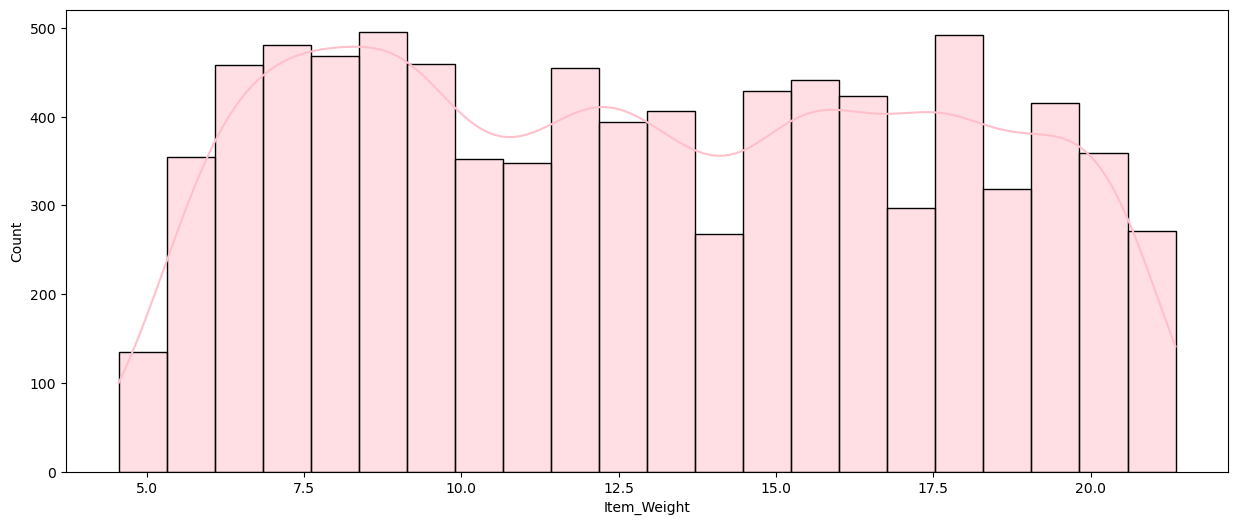

In [202]:
#Create Dist Plot – Item Weight
sns.histplot(dt['Item_Weight'], kde=True, color='pink')
plt.show()


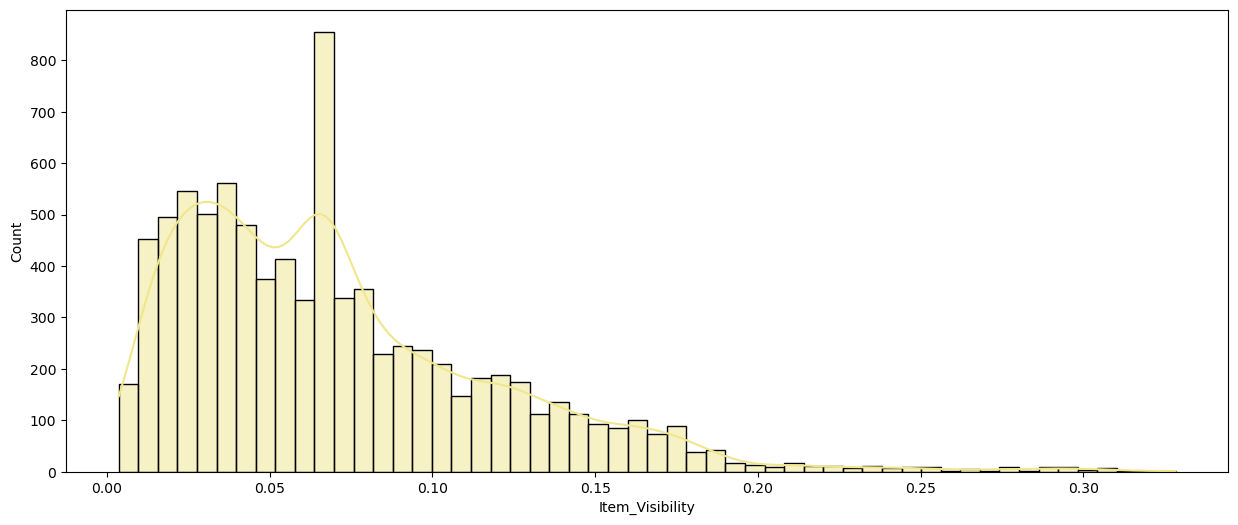

In [203]:
#Create Dist Plot – Item Visibility 
sns.histplot(dt['Item_Visibility'], kde=True, color='#F0E68C') 
plt.show()


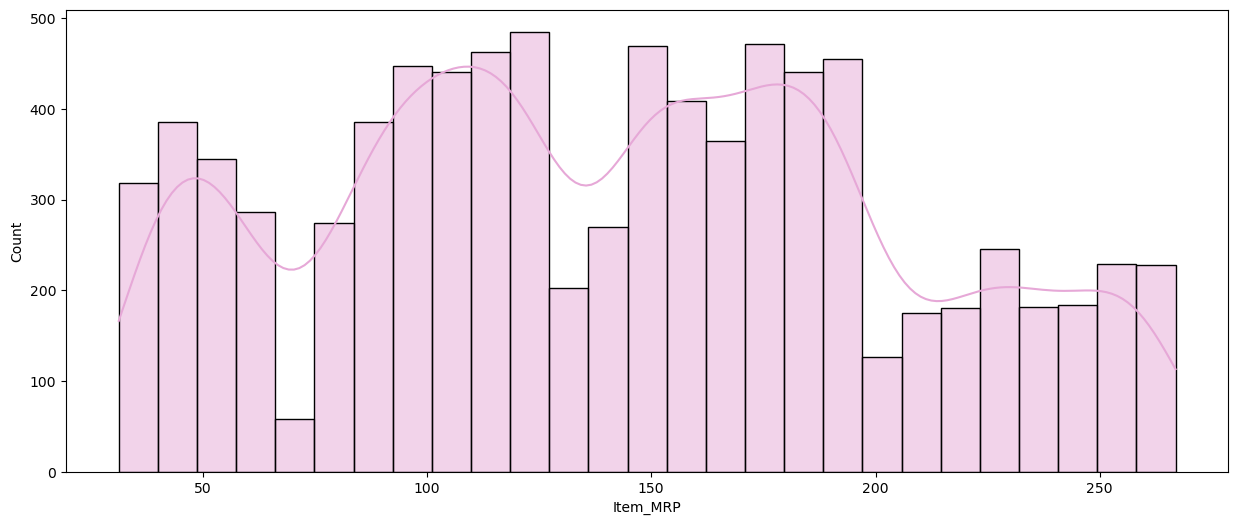

In [204]:
#Create Dist Plot – Item MRP 
sns.histplot(dt['Item_MRP'], kde=True, color='#E6A8D7')  # Medium lavender color
plt.show()

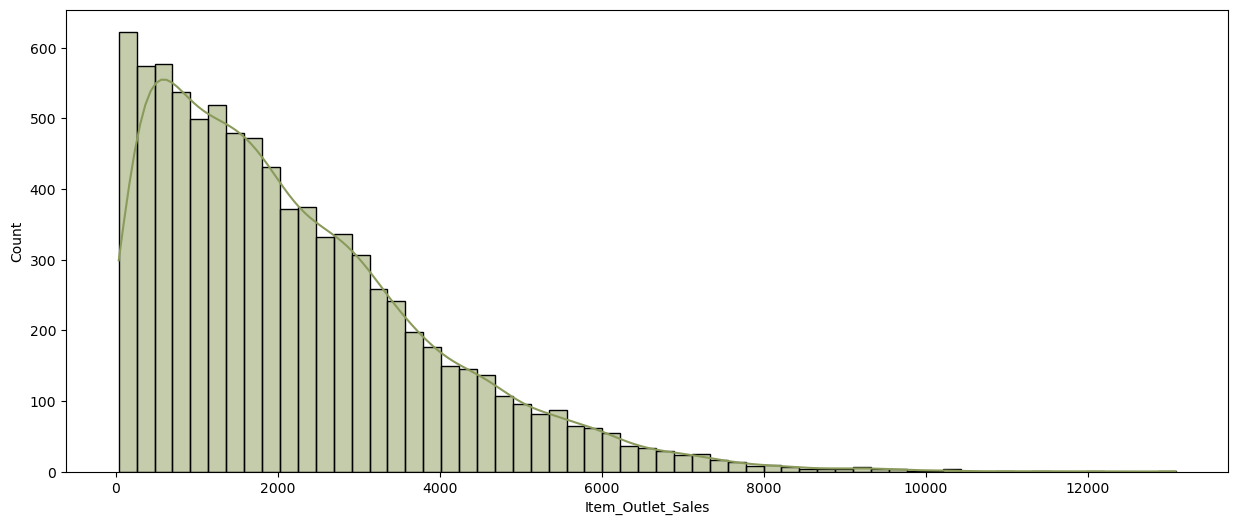

In [205]:
#Create Dist Plot – Item Outlet Sales 
sns.histplot(dt['Item_Outlet_Sales'], kde=True, color='#8A9A5B') 
plt.show()

In [206]:
#Log Transformation to reduce Outliers 
dt['Item_Outlet_Sales'] = np.log(1+dt['Item_Outlet_Sales'])
display (dt['Item_Outlet_Sales'])


0       8.225808
1       6.096776
2       7.648868
3       6.597664
4       6.903451
          ...   
8518    7.929984
8519    6.310436
8520    7.085159
8521    7.521100
8522    6.642056
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

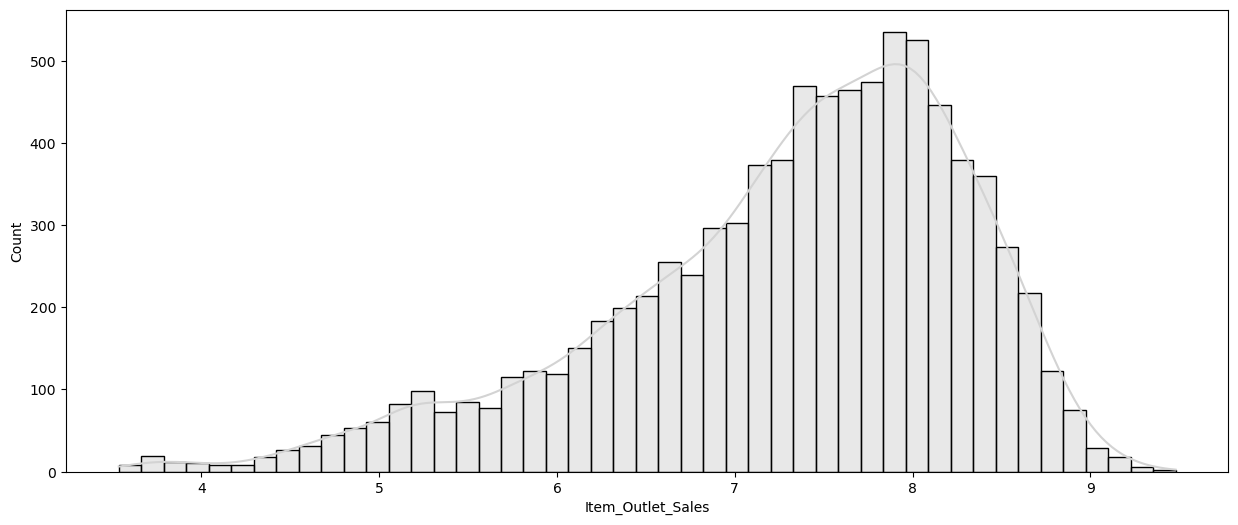

In [207]:
#Create Dist Plot – again 
sns.histplot(dt['Item_Outlet_Sales'], kde=True, color='#D3D3D3')  # Light grey color
plt.show()

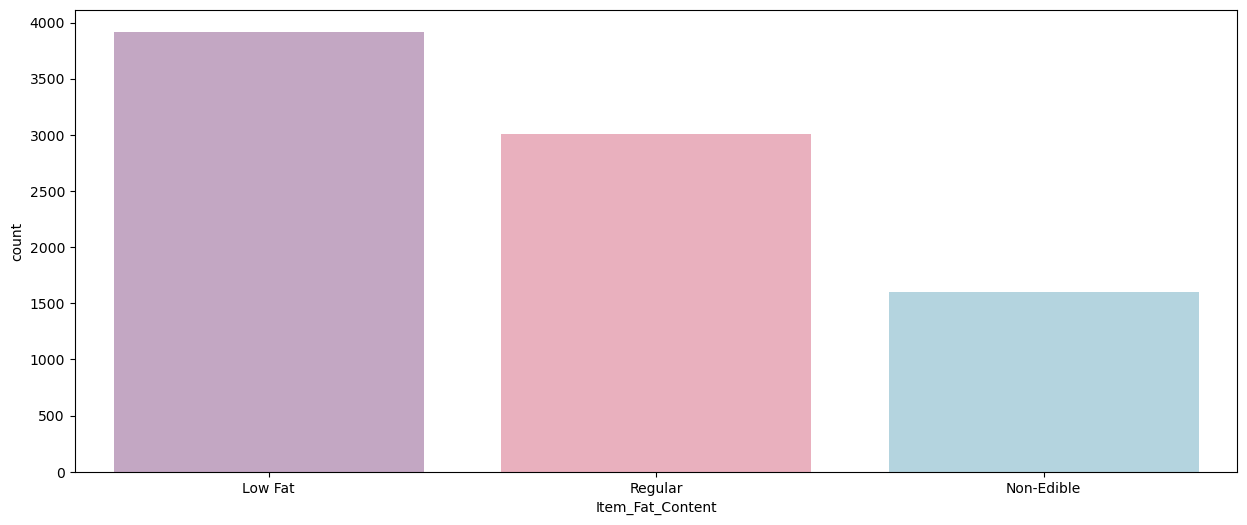

In [208]:
#Create Count Plot – Number of records in each category 
sns.countplot(x = dt["Item_Fat_Content"], palette=['#C8A2C8', '#F2A7B9', '#ADD8E6'])
plt.show()


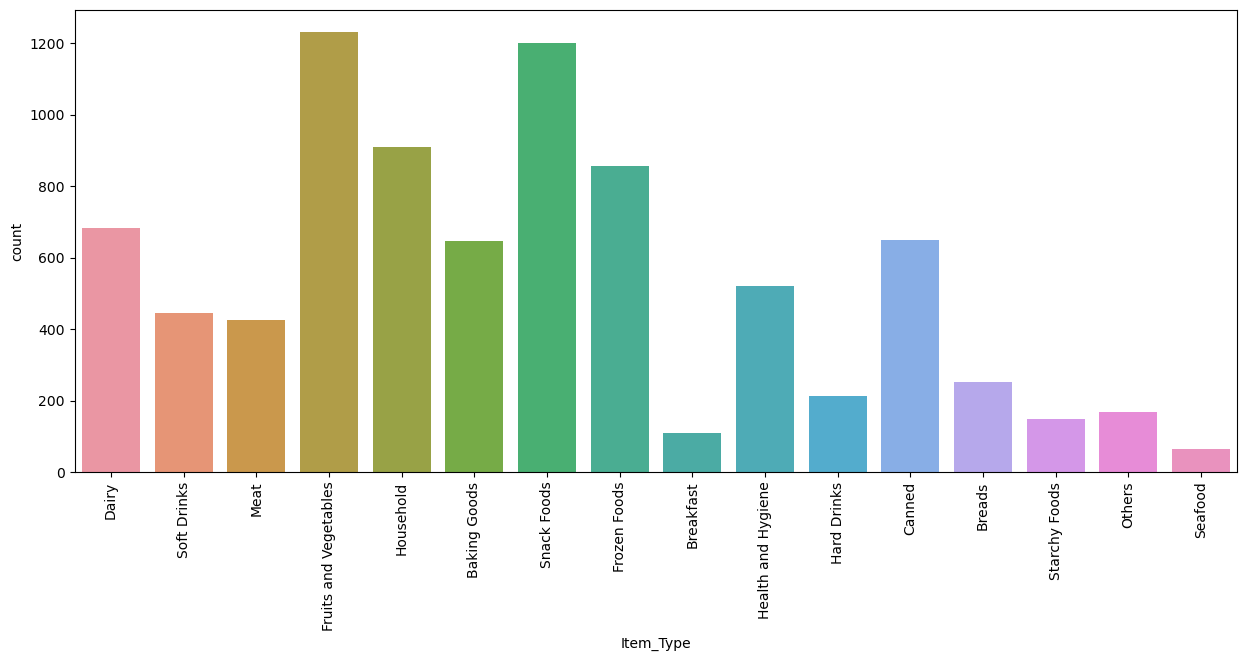

In [209]:
#Create Count Plot – Item Type 
l = dt['Item_Type'].unique()  # Get unique Item Types for X-labels
chart = sns.countplot(x='Item_Type', data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()


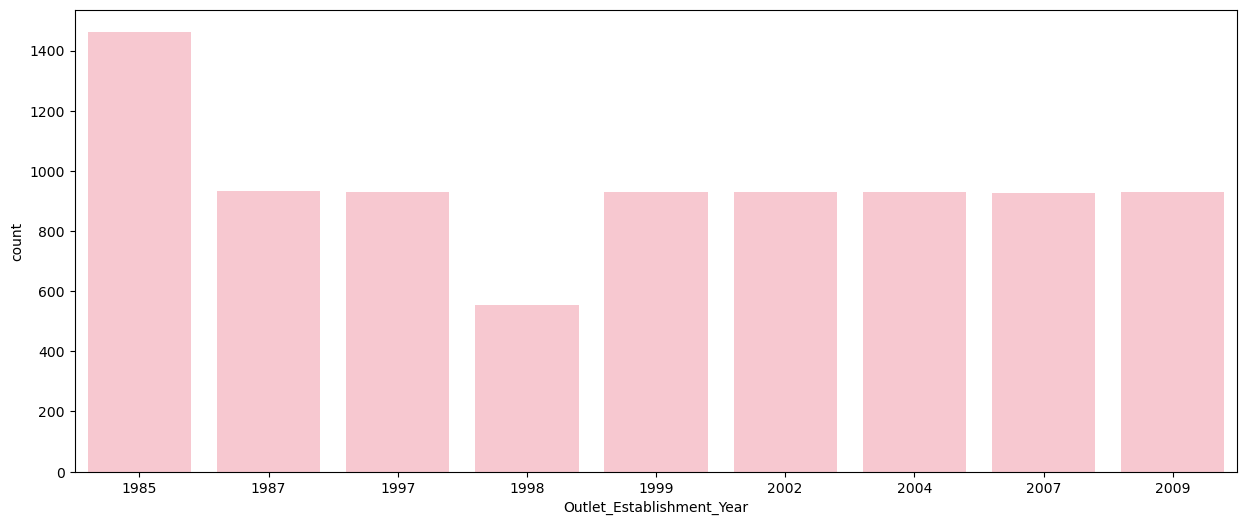

In [210]:
#Create Count Plot – Establishment year 
#Number of stores started per year  
sns.countplot(x=dt['Outlet_Establishment_Year'], color='pink')
plt.show()

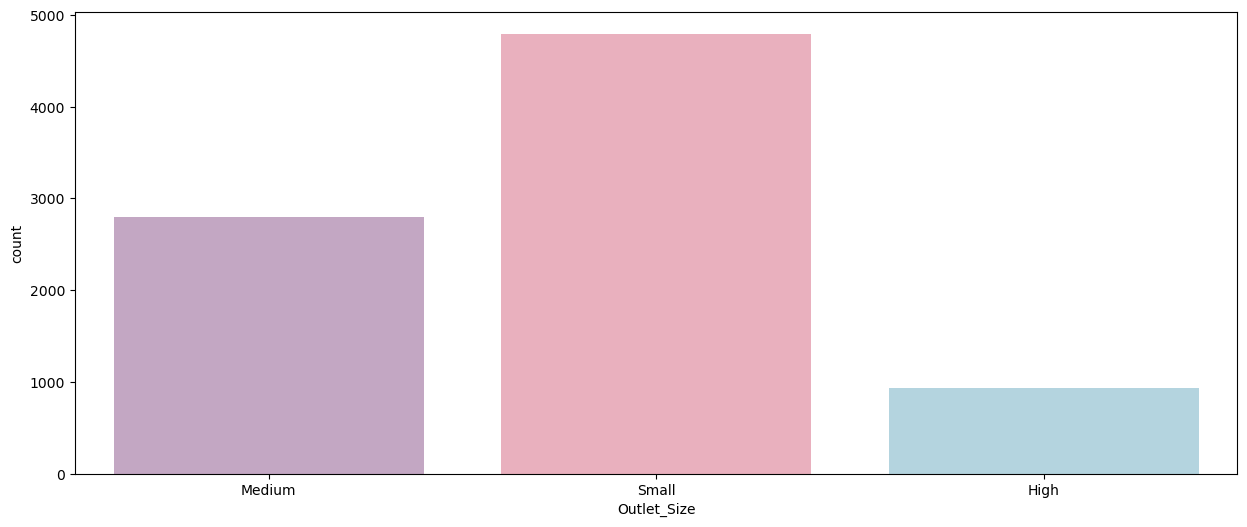

In [211]:
#Count Plot Outlet Size 
sns.countplot(x=dt['Outlet_Size'], palette=['#C8A2C8', '#F2A7B9', '#ADD8E6'])
plt.show()

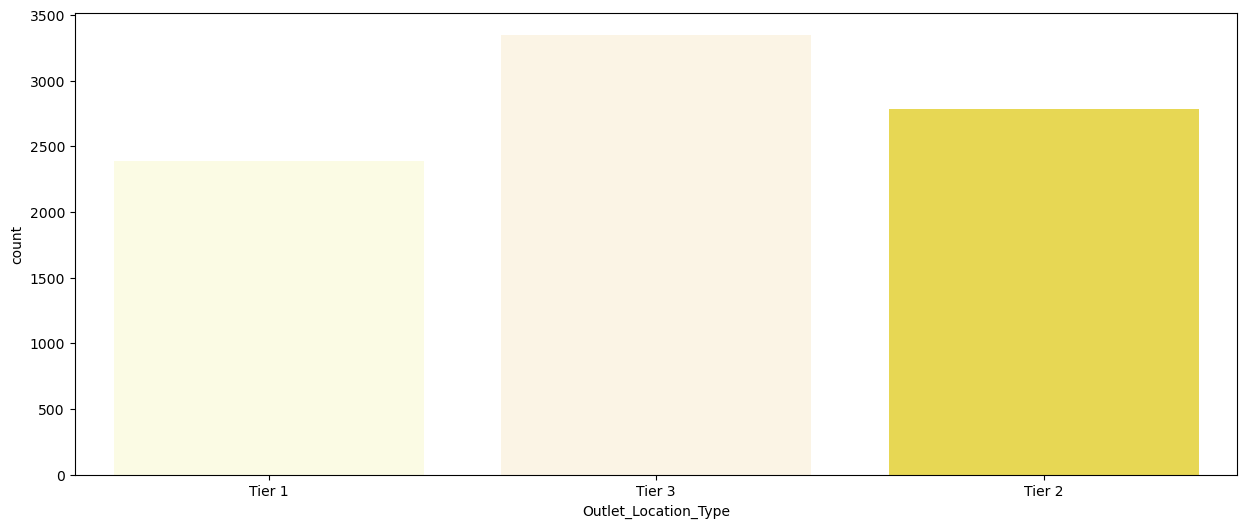

In [212]:
#Count Plot Outlet Location Type 
sns.countplot(x=dt['Outlet_Location_Type'], palette=['#FFFFE0', '#FFF5E1', '#FFEB3B'])
plt.show()

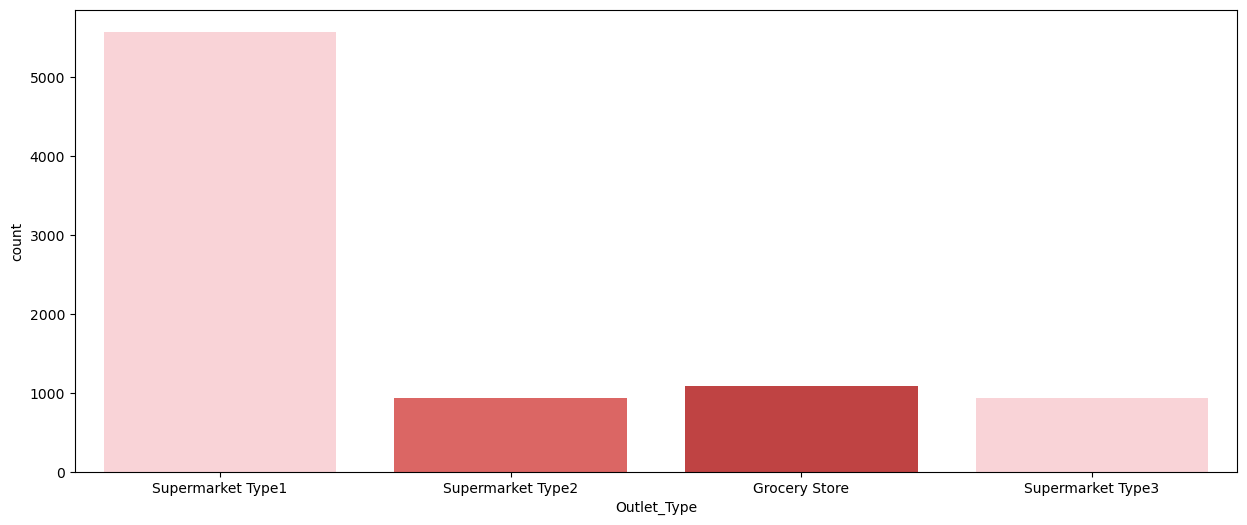

In [213]:
#Count Plot Outlet Type 
sns.countplot(x=dt['Outlet_Type'], palette=['#FFCDD2', '#EF5350', '#D32F2F'])
plt.show()

In [214]:
# Co-relation Matrix

In [215]:
#Display top 3 records to check columns with numeric values 
display(dt.head(3))

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,25
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,15
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food,25


In [216]:
#Create Data Frame with numeric columns 
dtc= dt.iloc[:,[1,3,5,7,11,13]]
display (dtc)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years
0,9.300,0.016047,249.8092,1999,8.225808,25
1,5.920,0.019278,48.2692,2009,6.096776,15
2,17.500,0.016760,141.6180,1999,7.648868,25
3,19.200,0.066132,182.0950,1998,6.597664,26
4,8.930,0.066132,53.8614,1987,6.903451,37
...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,7.929984,37
8519,8.380,0.046982,108.1570,2002,6.310436,22
8520,10.600,0.035186,85.1224,2004,7.085159,20
8521,7.210,0.145221,103.1332,2009,7.521100,15


In [217]:
#Print Co relation 
corr = dtc.corr()
display (corr)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years
Item_Weight,1.000000,-0.017476,0.025972,-0.013418,0.007674,0.013418
Item_Visibility,-0.017476,1.000000,-0.005259,-0.078355,-0.202466,0.078355
Item_MRP,0.025972,-0.005259,1.000000,0.005020,0.509886,-0.005020
Outlet_Establishment_Year,-0.013418,-0.078355,0.005020,1.000000,0.077032,-1.000000
Item_Outlet_Sales,0.007674,-0.202466,0.509886,0.077032,1.000000,-0.077032
Outlet_Years,0.013418,0.078355,-0.005020,-1.000000,-0.077032,1.000000


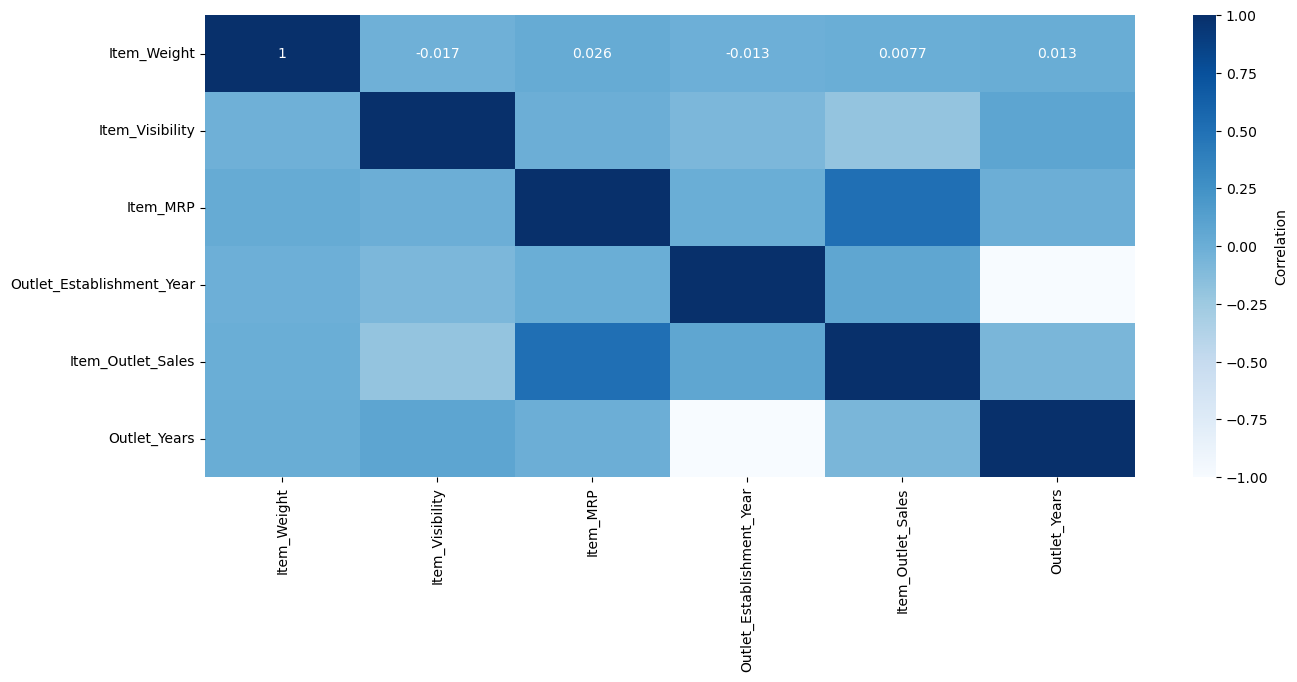

In [218]:
#Print Co Relation Matrix 
sns.heatmap(corr, annot=True, cmap='Blues', cbar_kws={'label': 'Correlation'})
plt.show()

In [219]:
#Display Top 5 Records  
display (dt.head())

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,25
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,15
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food,25
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,6.597664,Food,26
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451,Non-Consumable,37


In [220]:
# Label Encoding 

In [221]:
#Label Encoding – Column Outlet Identifier 
from sklearn.preprocessing import LabelEncoder
dt['Outlet'] = le.fit_transform(dt['Outlet_Identifier'])
print(dt['Outlet'])


0       9
1       3
2       9
3       0
4       1
       ..
8518    1
8519    7
8520    6
8521    3
8522    8
Name: Outlet, Length: 8523, dtype: int32


In [222]:
#Label Encoding – Remaining columns with For loop  
le = LabelEncoder()
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']

for col in cat_col:
    dt[col] = dt[col].astype(str)  # Ensure columns are strings before encoding
    dt[col] = le.fit_transform(dt[col])

print(dt.head())

  Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0           FDA15         9.30                 0         0.016047          4   
1           DRC01         5.92                 2         0.019278         14   
2           FDN15        17.50                 0         0.016760         10   
3           FDX07        19.20                 2         0.066132          6   
4           NCD19         8.93                 1         0.066132          9   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0  249.8092            OUT049                       1999            1   
1   48.2692            OUT018                       2009            1   
2  141.6180            OUT049                       1999            1   
3  182.0950            OUT010                       1998            2   
4   53.8614            OUT013                       1987            0   

   Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  New_Item_Type  \
0     

In [223]:
# One hot Encoding

In [224]:
dt = pd.get_dummies(dt, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'],dtype = int )
display (dt.head())


,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,8.225808,25,9,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,6.096776,15,3,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,7.648868,25,9,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.066132,6,182.0950,OUT010,1998,6.597664,26,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.066132,9,53.8614,OUT013,1987,6.903451,37,1,...,0,0,1,0,1,0,0,0,0,1


In [225]:
#Create X – Remove un used columns
X = dt.drop(['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'], axis=1)
print(X.head())


   Item_Weight  Item_Visibility  Item_Type  Item_MRP  Outlet_Years  Outlet  \
0         9.30         0.016047          4  249.8092            25       9   
1         5.92         0.019278         14   48.2692            15       3   
2        17.50         0.016760         10  141.6180            25       9   
3        19.20         0.066132          6  182.0950            26       0   
4         8.93         0.066132          9   53.8614            37       1   

   Item_Fat_Content_0  Item_Fat_Content_1  Item_Fat_Content_2  Outlet_Size_0  \
0                   1                   0                   0              0   
1                   0                   0                   1              0   
2                   1                   0                   0              0   
3                   0                   0                   1              0   
4                   0                   1                   0              1   

   ...  Outlet_Location_Type_0  Outlet_Location_Ty

In [226]:
#Create y 
y = dt['Item_Outlet_Sales']
display (y.head())


0    8.225808
1    6.096776
2    7.648868
3    6.597664
4    6.903451
Name: Item_Outlet_Sales, dtype: float64

In [227]:
#Function to create Model 
from sklearn import metrics 
display (",   ".join(metrics.get_scorer_names()))


'accuracy,   adjusted_mutual_info_score,   adjusted_rand_score,   average_precision,   balanced_accuracy,   completeness_score,   explained_variance,   f1,   f1_macro,   f1_micro,   f1_samples,   f1_weighted,   fowlkes_mallows_score,   homogeneity_score,   jaccard,   jaccard_macro,   jaccard_micro,   jaccard_samples,   jaccard_weighted,   matthews_corrcoef,   max_error,   mutual_info_score,   neg_brier_score,   neg_log_loss,   neg_mean_absolute_error,   neg_mean_absolute_percentage_error,   neg_mean_gamma_deviance,   neg_mean_poisson_deviance,   neg_mean_squared_error,   neg_mean_squared_log_error,   neg_median_absolute_error,   neg_negative_likelihood_ratio,   neg_root_mean_squared_error,   normalized_mutual_info_score,   positive_likelihood_ratio,   precision,   precision_macro,   precision_micro,   precision_samples,   precision_weighted,   r2,   rand_score,   recall,   recall_macro,   recall_micro,   recall_samples,   recall_weighted,   roc_auc,   roc_auc_ovo,   roc_auc_ovo_weighte

Train Test Split
(1000, 5) (1000,)
(700, 5) (300, 5) (700,) (300,)
Model Report
Scoring - neg_mean_squared_error
[-0.0109864  -0.01110191 -0.01054772 -0.01021259 -0.01192526]
ABS Average of - neg_mean_squared_error 0.010954774710738933

R2 Score 
[0.99999928 0.99999927 0.99999923 0.9999994  0.99999921]
Average R2 Score  0.9999992771451943

Accuracy
Accuracy of Test data
R2_Score: 0.9999992068736278
Accuracy of Training data
R2_Score: 0.9999993379427615
Accuracy of Complete data
R2_Score: 0.9999992995346942

Display actual and predicted values


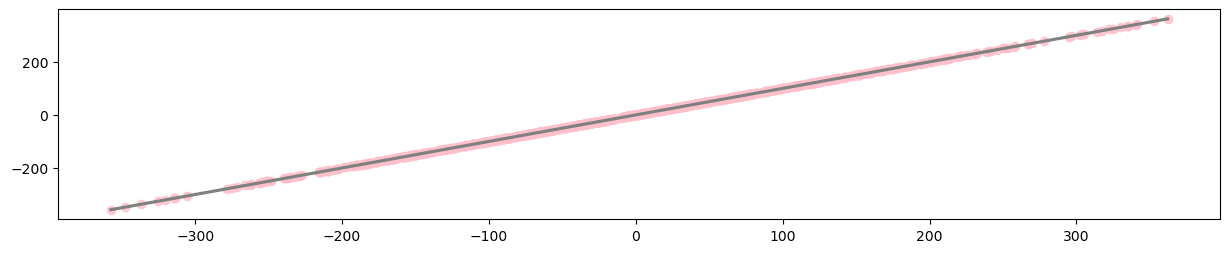

Feature_3    28.264297
Feature_1    45.155024
Feature_4    53.685379
Feature_2    60.588957
Feature_5    71.624773
dtype: float64


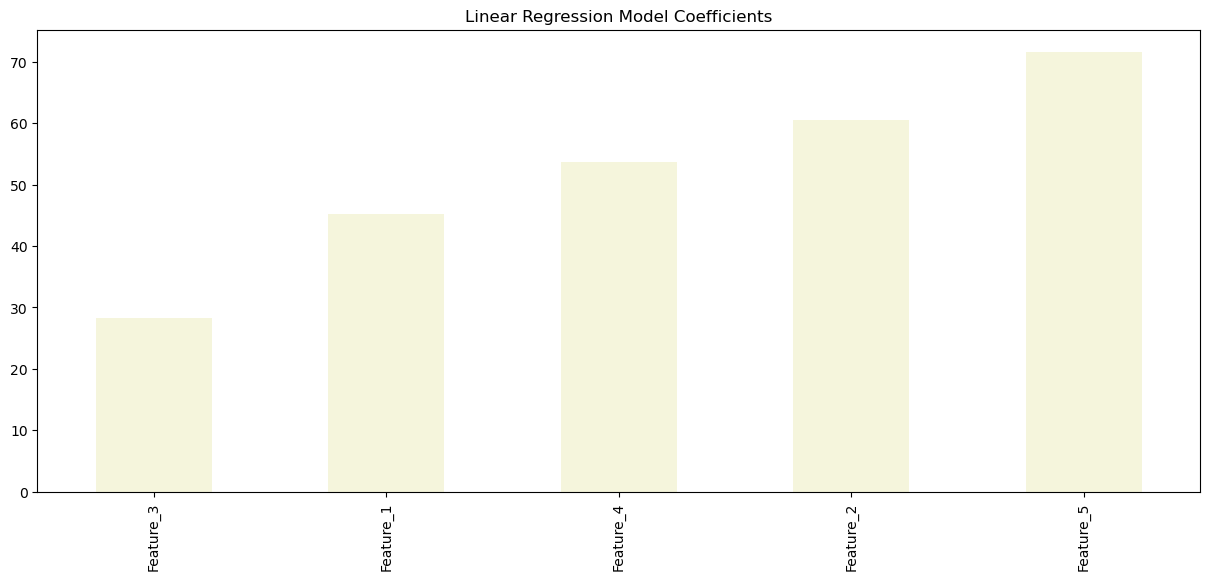

In [275]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def train(model, X, y):

    print ("Train Test Split")
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    print (X.shape, y.shape)
    print (X_train.shape, X_test.shape ,  y_train.shape, y_test.shape)
    
    # training the model
    model.fit(X_train, y_train)       
   
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    print("Model Report")
    print ('Scoring - neg_mean_squared_error')
    print ( cv_score )    
    cv_score = np.abs(np.mean(cv_score))    
    print ('ABS Average of - neg_mean_squared_error',cv_score )       
    cv_score = cross_val_score(model, X, y,  cv=5)
    print ()
    print ('R2 Score ')
    print ( cv_score )    
    cv_score = np.mean(cv_score)     
    print ('Average R2 Score ',cv_score)    
    print ()
    
    # Display Accuracy
    print ('Accuracy')
    print ('Accuracy of Test data')
    y_test_pred = model.predict(X_test)
    print('R2_Score:', r2_score(y_test,y_test_pred))
    print ('Accuracy of Training data')
    y_train_pred = model.predict(X_train)
    print('R2_Score:', r2_score(y_train,y_train_pred))
    print ('Accuracy of Complete data')
    y_pred = model.predict(X)
    print('R2_Score:', r2_score(y,y_pred))
    print ()

    # Display graph with actual and predicted values 
    
    plt.subplot (212)
    print ('Display actual and predicted values')
    sns.regplot( x =y, y= y_pred, scatter_kws={"color": "pink"}, 
            line_kws={"color": "grey"},ci = None)
    plt.show()

#Create Linear Regression Model  

from sklearn.linear_model import LinearRegression
model = LinearRegression()
train(model, X,y)
coef = pd.Series(model.coef_, X.columns).sort_values()
print (coef)
coef.plot(kind='bar', title="Linear Regression Model Coefficients", color="#f5f5dc")
plt.show()


Train Test Split
(1000, 5) (1000,)
(700, 5) (300, 5) (700,) (300,)
Model Report
Scoring - neg_mean_squared_error
[-0.03348369 -0.03741882 -0.02678367 -0.0394953  -0.02707461]
ABS Average of - neg_mean_squared_error 0.03285121702968846

R2 Score 
[0.99999781 0.99999754 0.99999804 0.99999767 0.9999982 ]
Average R2 Score  0.9999978532996415

Accuracy
Accuracy of Test data
R2_Score: 0.9999972249286261
Accuracy of Training data
R2_Score: 0.9999975539936131
Accuracy of Complete data
R2_Score: 0.9999974575670704

Display actual and predicted values


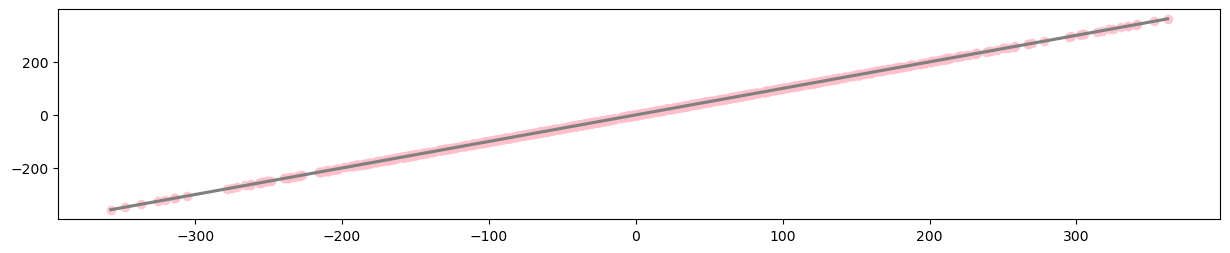

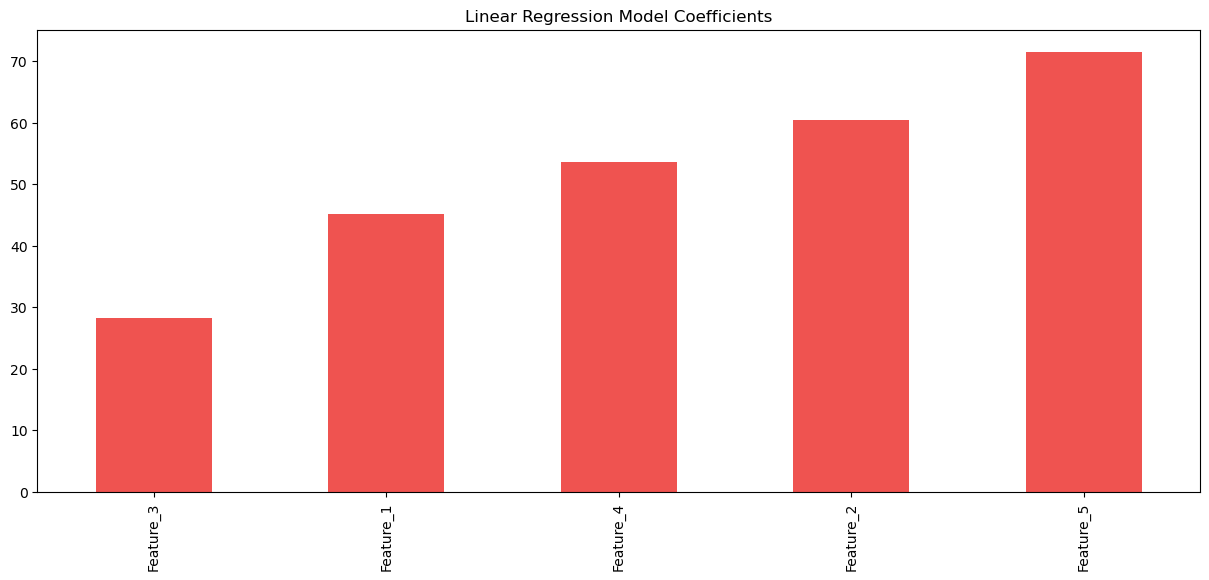

In [280]:
#Create Ridge Regression 
from sklearn.linear_model import Ridge
model = Ridge()
train(model, X,y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Linear Regression Model Coefficients", color="#EF5350")
plt.show()


Train Test Split
(1000, 5) (1000,)
(700, 5) (300, 5) (700,) (300,)
Model Report
Scoring - neg_mean_squared_error
[-5.08174209 -5.31983792 -4.20021841 -5.47959147 -4.29293524]
ABS Average of - neg_mean_squared_error 4.874865026575184

R2 Score 
[0.99966823 0.99965058 0.99969211 0.99967743 0.99971437]
Average R2 Score  0.9996805447897472

Accuracy
Accuracy of Test data
R2_Score: 0.9996738955157874
Accuracy of Training data
R2_Score: 0.9996918547749458
Accuracy of Complete data
R2_Score: 0.9996865924903111

Display actual and predicted values


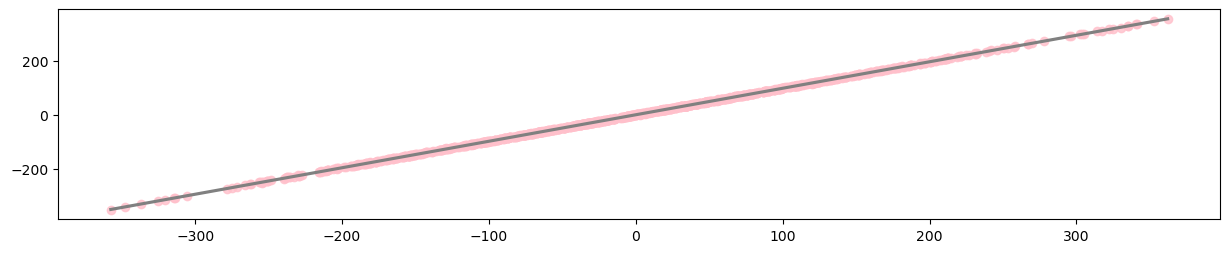

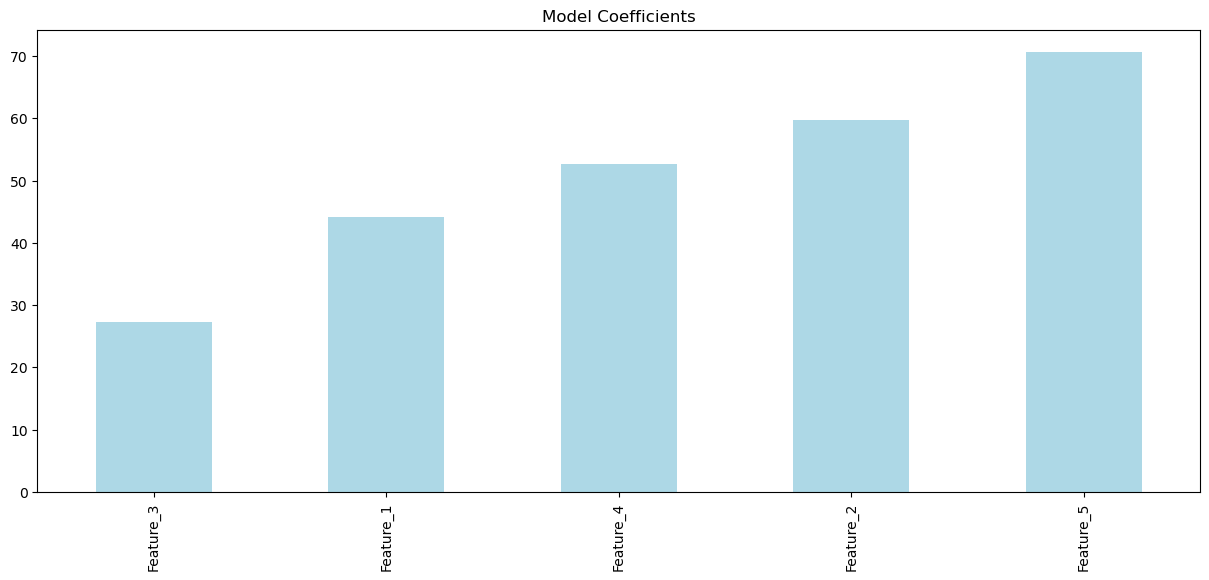

In [282]:
#Create  Lasso Regression 
from sklearn.linear_model import Lasso
model = Lasso()
train(model, X,y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients", color=  "#ADD8E6")
plt.show()


Train Test Split
(1000, 5) (1000,)
(700, 5) (300, 5) (700,) (300,)
Model Report
Scoring - neg_mean_squared_error
[-4115.22300406 -4414.49425938 -3575.54859213 -3952.18385059
 -3366.14044339]
ABS Average of - neg_mean_squared_error 3884.7180299086126

R2 Score 
[0.72110007 0.73044244 0.74638104 0.79536434 0.77585749]
Average R2 Score  0.7538290741995481

Accuracy
Accuracy of Test data
R2_Score: 0.7251386694160137
Accuracy of Training data
R2_Score: 1.0
Accuracy of Complete data
R2_Score: 0.9194527471862954

Display actual and predicted values


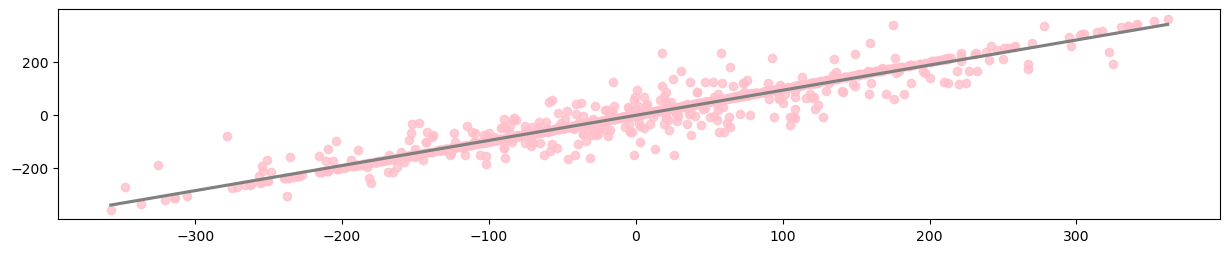

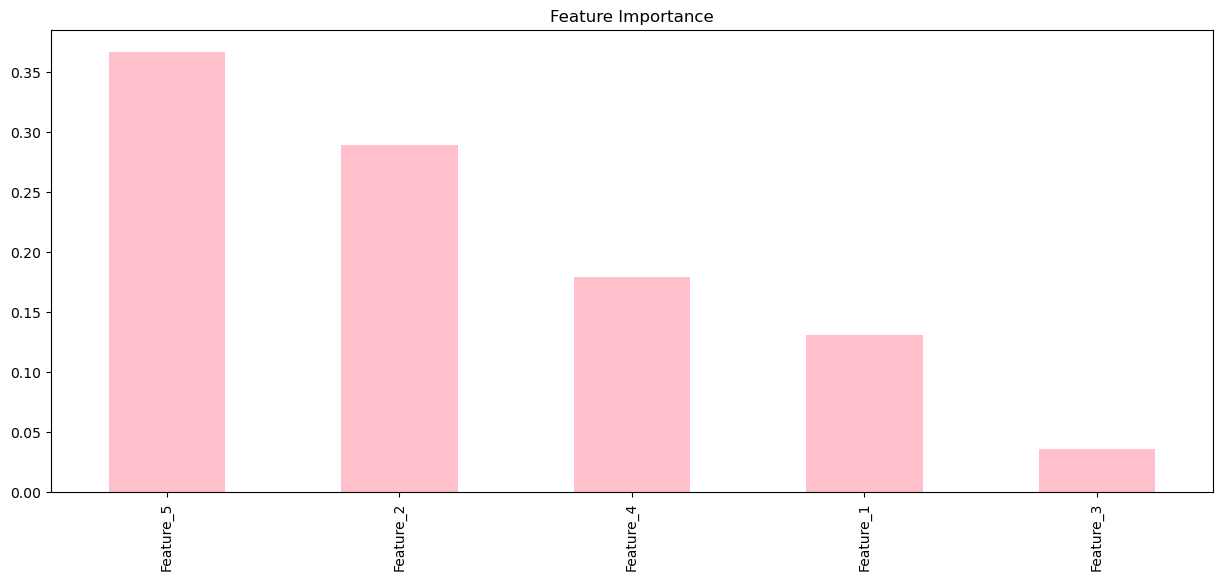

In [324]:
#Decision Tree Regression  

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X,y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance", color = "#FFC0CB")
plt.show()


Train Test Split
(1000, 5) (1000,)
(700, 5) (300, 5) (700,) (300,)
Model Report
Scoring - neg_mean_squared_error
[-1152.86143691 -1276.07463767 -1107.736483   -1073.7213826
 -1231.48669538]
ABS Average of - neg_mean_squared_error 1168.3761271115568

R2 Score 
[0.91992326 0.9131073  0.91931848 0.93816366 0.91051218]
Average R2 Score  0.9202049770344303

Accuracy
Accuracy of Test data
R2_Score: 0.9105631615274126
Accuracy of Training data
R2_Score: 0.9872092317803195
Accuracy of Complete data
R2_Score: 0.9647483664766722

Display actual and predicted values


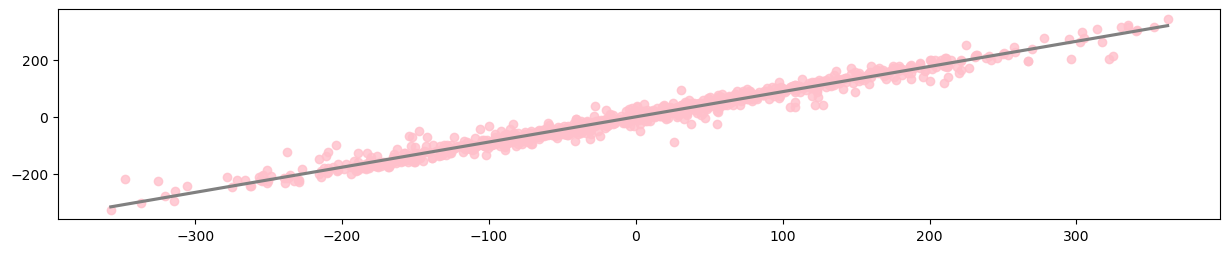

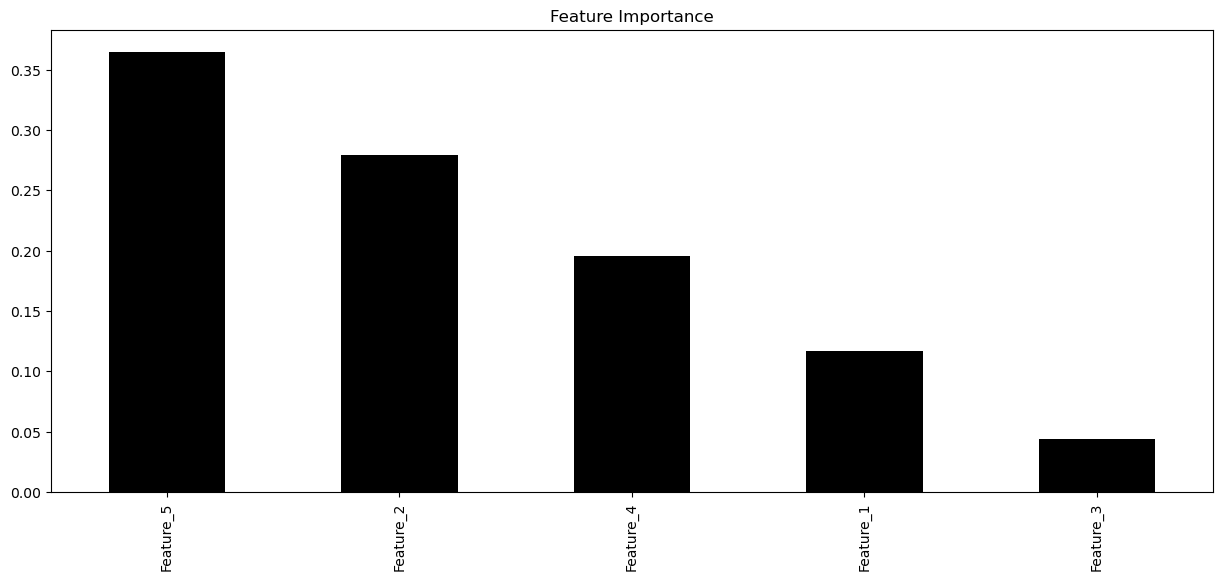

In [286]:
#Random Forest Regression  
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X,y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance", color = "black")
plt.show()


Train Test Split
(1000, 5) (1000,)
(700, 5) (300, 5) (700,) (300,)
Model Report
Scoring - neg_mean_squared_error
[-873.86825239 -897.31989632 -805.51469464 -808.91360462 -906.63298189]
ABS Average of - neg_mean_squared_error 858.4498859714743

R2 Score 
[0.94296028 0.93965502 0.93982005 0.95716315 0.94303286]
Average R2 Score  0.9445262729159601

Accuracy
Accuracy of Test data
R2_Score: 0.9373529698820995
Accuracy of Training data
R2_Score: 1.0
Accuracy of Complete data
R2_Score: 0.9816414838631059

Display actual and predicted values


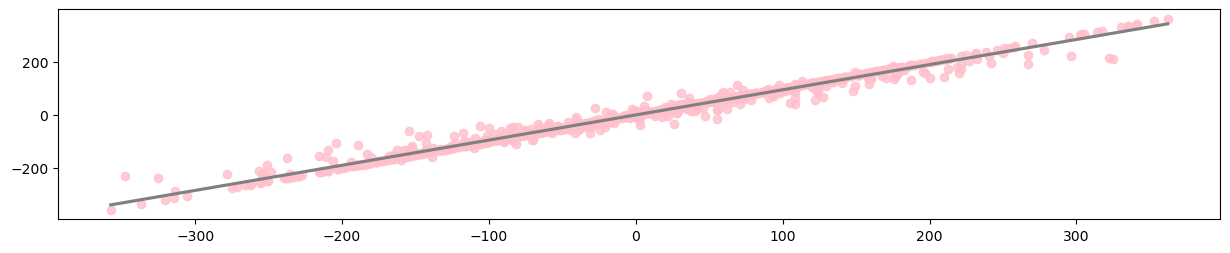

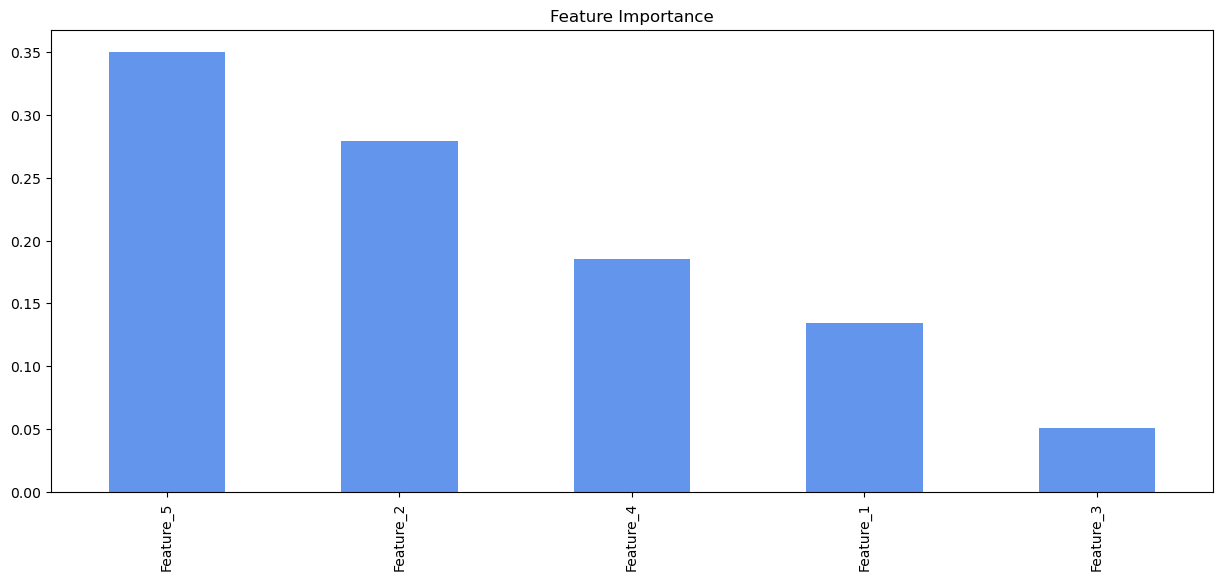

In [289]:
#Extra Tree Regression  
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, X,y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance", color = "#6495ED")
plt.show()


Train Test Split
(1000, 5) (1000,)
(700, 5) (300, 5) (700,) (300,)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1168
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 5
[LightGBM] [Info] Start training from score -0.588189
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

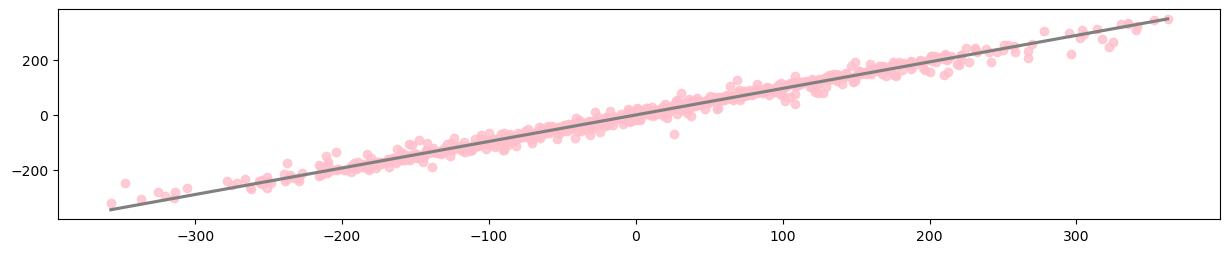

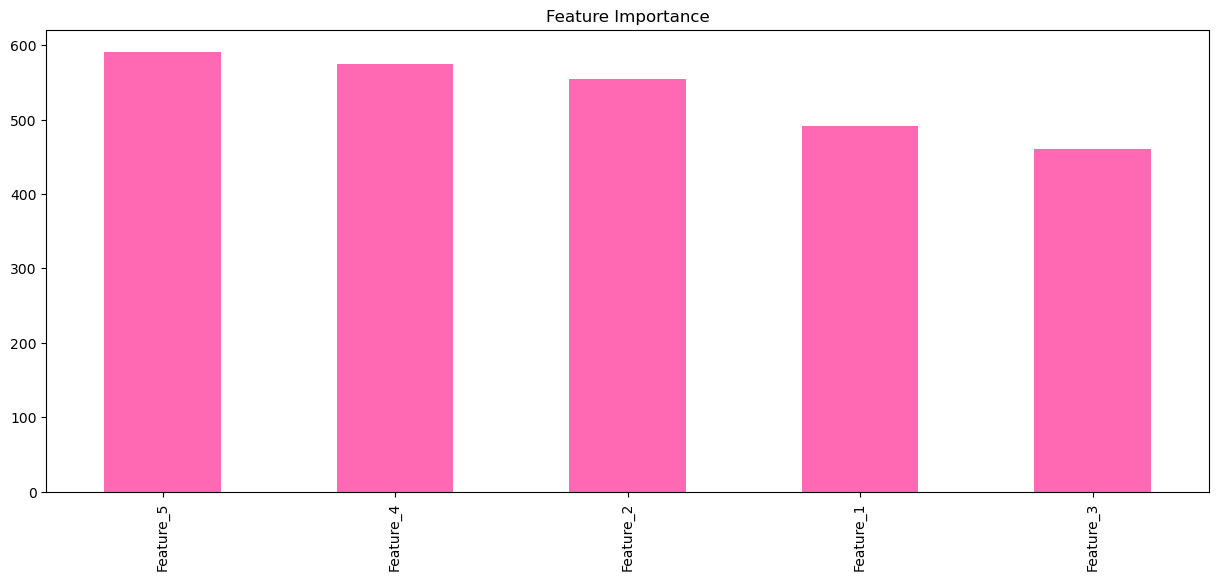

In [295]:
#LGBMRegressor

from lightgbm import LGBMRegressor
model = LGBMRegressor()
train(model, X,y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance", color ="#FF69B4" )
plt.show()


Train Test Split
(1000, 5) (1000,)
(700, 5) (300, 5) (700,) (300,)
Model Report
Scoring - neg_mean_squared_error
[ -972.41287688 -1074.31863974  -911.69446361  -958.19556997
 -1178.15728315]
ABS Average of - neg_mean_squared_error 1018.9557666721333

R2 Score 
[0.9365148  0.92943691 0.93316906 0.94359289 0.92161256]
Average R2 Score  0.9328652420225882

Accuracy
Accuracy of Test data
R2_Score: 0.915691817066841
Accuracy of Training data
R2_Score: 0.9999573935741748
Accuracy of Complete data
R2_Score: 0.9752636301537515

Display actual and predicted values


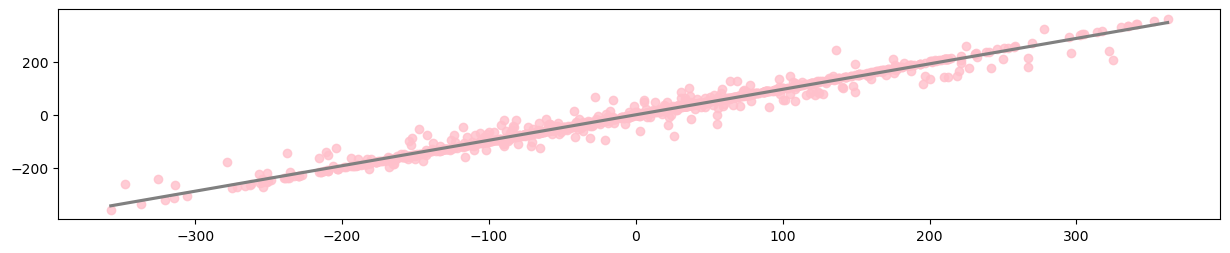

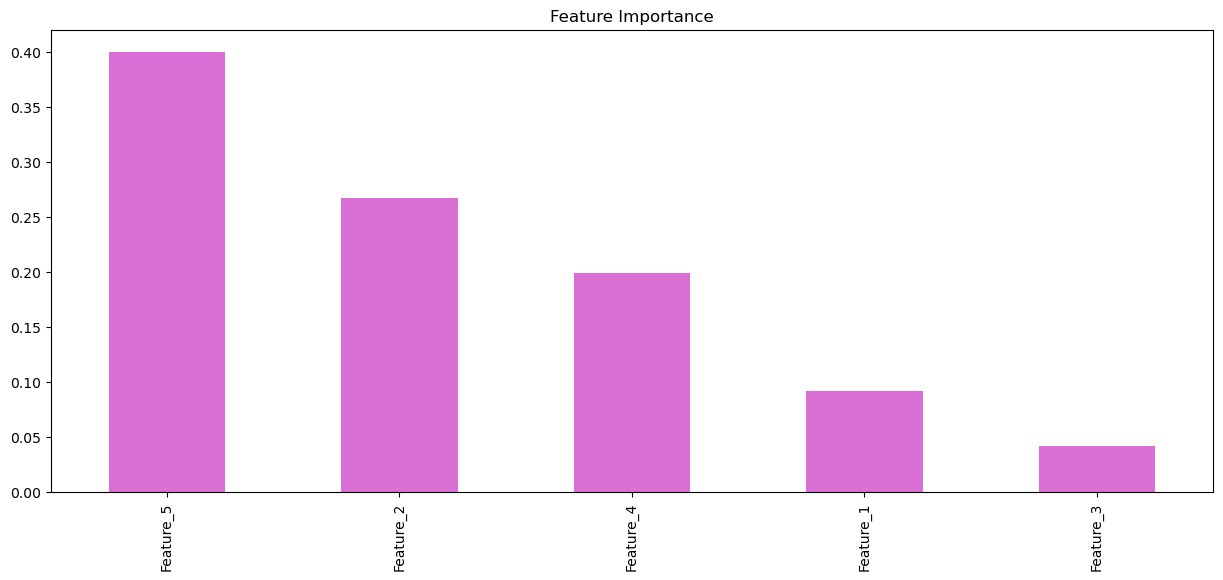

In [298]:
#XG Boost Regressor 
from xgboost import XGBRegressor
model = XGBRegressor()
train(model, X,y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance", color = "#DA70D6")
plt.show()


In [299]:
#Train Test Split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print (X.shape, y.shape)
print (X_train.shape, X_test.shape ,  y_train.shape, y_test.shape)


(1000, 5) (1000,)
(700, 5) (300, 5) (700,) (300,)


In [300]:
#Parameters   
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]


In [301]:
#Param Grid    
random_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)


{'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [302]:
#Random Forest Regression 

from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor()
rf=RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)
display (rf.fit(X_train, y_train))


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [303]:
#Best Parameters  and Plot Graph

print(rf.best_params_)
print(rf.best_score_)


{'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 15}
-1561.518785262961


In [304]:
#Display Accuracy
print ()
print ('Accuracy')
print ('Accuracy of Test data')
y_test_pred = rf.predict(X_test)
print('R2_Score:', r2_score(y_test,y_test_pred))
print ('Accuracy of Training data')
y_train_pred = rf.predict(X_train)
print('R2_Score:', r2_score(y_train,y_train_pred))
print ('Accuracy of Complete data')
y_pred = rf.predict(X)
print('R2_Score:', r2_score(y,y_pred))
print ()



Accuracy
Accuracy of Test data
R2_Score: 0.9044683080658067
Accuracy of Training data
R2_Score: 0.9789529662008101
Accuracy of Complete data
R2_Score: 0.9571255125682769



Display actual and predicted values


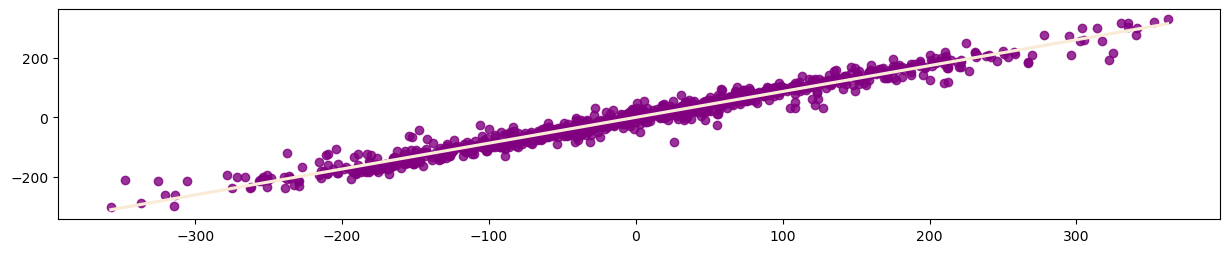

In [306]:
# Display graph with actual and predicted values 
    
plt.subplot (212)
print ('Display actual and predicted values')
sns.regplot( x =y, y= y_pred, scatter_kws={"color": "#800080"}, line_kws={"color": "#FAEBD7"},ci = None)
plt.show()


In [307]:
#Parameter for LGBM Regressor 

from scipy.stats import uniform, randint
params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}


In [308]:
#Model LGBM Regressor 
lgb=LGBMRegressor()
lgb = RandomizedSearchCV(estimator = lgb, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
lgb.fit(X,y)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 5
[LightGBM] [Info] Start training from score -1.505722
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=1,
                   param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000020B03C31110>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000020B03C14750>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020B03D23D90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020B03B14AD0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000020B03CCC710>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [309]:
#Best Parameter  and plot Graph
print(lgb.best_params_)
print(lgb.best_score_)


{'gamma': 0.34015376929388985, 'learning_rate': 0.16514977559086289, 'max_depth': 3, 'n_estimators': 103, 'subsample': 0.9768807022739411}
-439.0462969898582


In [310]:
# Display Accuracy
print ()
print ('Accuracy')
print ('Accuracy of Test data')
y_test_pred = lgb.predict(X_test)
print('R2_Score:', r2_score(y_test,y_test_pred))
print ('Accuracy of Training data')
y_train_pred = lgb.predict(X_train)
print('R2_Score:', r2_score(y_train,y_train_pred))
print ('Accuracy of Complete data')
y_pred = lgb.predict(X)
print('R2_Score:', r2_score(y,y_pred))
print ()



Accuracy
Accuracy of Test data
[LightGBM] [Warning] Unknown parameter: gamma
R2_Score: 0.9922438480638369
Accuracy of Training data
[LightGBM] [Warning] Unknown parameter: gamma
R2_Score: 0.9918080934152587
Accuracy of Complete data
[LightGBM] [Warning] Unknown parameter: gamma
R2_Score: 0.9919358064355207



Display actual and predicted values


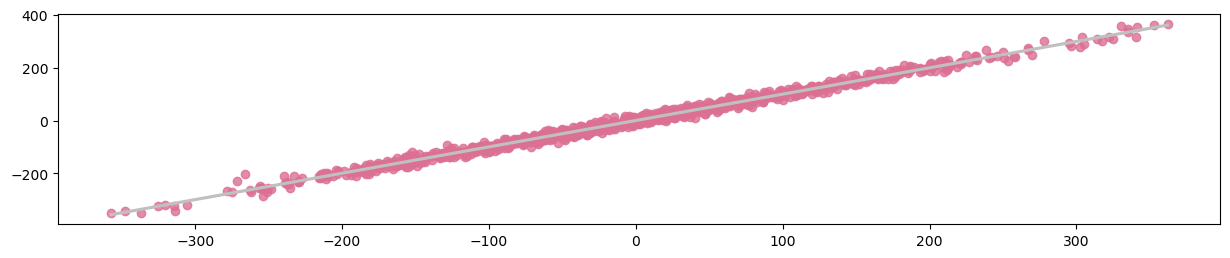

In [313]:
# Display graph with actual and predicted values 
    
plt.subplot (212)
print ('Display actual and predicted values')
sns.regplot( x =y, y= y_pred, scatter_kws={"color": "#DB7093"}, line_kws={"color": "#C0C0C0"},ci = None)
plt.show()


In [314]:
#Model XG Boost  
params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}


In [315]:
#XG Boost Regressor  
xgb = RandomizedSearchCV(estimator = model, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
xgb.fit(X,y)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.1s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gamma=0.07800932022121826, learning_rate=0.07679835610086079, max_depth=4, n_estimators=110, subsample=0.9464704583099741; total time=   0.0s
[CV] END gamma=0.07800932022121826, le

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000020B04194750>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020B7A1F0810>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020B03B8FE50>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000020B7907B390>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [316]:
#Print Best Parameter   and plot Graph
print(xgb.best_params_)
print(xgb.best_score_)


{'gamma': 0.28164410892276964, 'learning_rate': 0.14562495076197482, 'max_depth': 3, 'n_estimators': 101, 'subsample': 0.8736932106048627}
-436.5829130221342


In [317]:
# Display Accuracy
print ()
print ('Accuracy')
print ('Accuracy of Test data')
y_test_pred = xgb.predict(X_test)
print('R2_Score:', r2_score(y_test,y_test_pred))
print ('Accuracy of Training data')
y_train_pred = xgb.predict(X_train)
print('R2_Score:', r2_score(y_train,y_train_pred))
print ('Accuracy of Complete data')
y_pred = xgb.predict(X)
print('R2_Score:', r2_score(y,y_pred))
print ()


Accuracy
Accuracy of Test data
R2_Score: 0.9929631560001664
Accuracy of Training data
R2_Score: 0.9928905857174224
Accuracy of Complete data
R2_Score: 0.9929118665175417



Display actual and predicted values


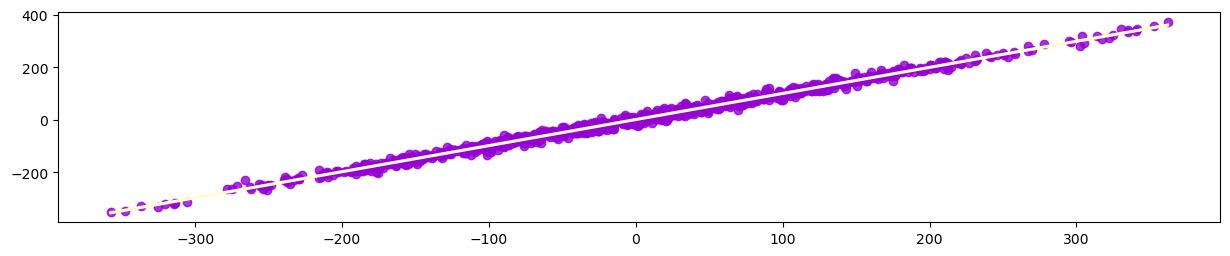

In [322]:
# Display graph with actual and predicted values 
    
plt.subplot (212)
print ('Display actual and predicted values')
sns.regplot( x =y, y= y_pred, scatter_kws={"color": "#9400D3"}, line_kws={"color": "#FFFDD0"},ci = None)
plt.show()
